In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

**Loading Dataset:**

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Dataset/breast-cancer.data")

**Adding attribute's names:**

In [ ]:
dataset.columns=['class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
print(dataset.head())

                  class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  40-49   premeno      20-24       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  60-69      ge40      15-19       0-2        no   
3  no-recurrence-events  40-49   premeno        0-4       0-2        no   
4  no-recurrence-events  60-69      ge40      15-19       0-2        no   

   deg-malig breast breast-quad irradiat  
0          2  right    right_up       no  
1          2   left    left_low       no  
2          2  right     left_up       no  
3          2  right   right_low       no  
4          2   left    left_low       no  


**Replacing missing values:**

In [ ]:
dataset["node-caps"].replace({"?":""}, inplace=True)
dataset["breast-quad"].replace({"?":""}, inplace=True)

**Data Encoding:**

In [ ]:
label_encoder = preprocessing.LabelEncoder()

dataset['class']= label_encoder.fit_transform(dataset['class'])
dataset['age']= label_encoder.fit_transform(dataset['age'])
dataset['menopause']= label_encoder.fit_transform(dataset['menopause'])
dataset['tumor-size']= label_encoder.fit_transform(dataset['tumor-size'])
dataset['inv-nodes']= label_encoder.fit_transform(dataset['inv-nodes'])
dataset['node-caps']= label_encoder.fit_transform(dataset['node-caps'])
dataset['breast-quad']= label_encoder.fit_transform(dataset['breast-quad'])
dataset['breast']= label_encoder.fit_transform(dataset['breast'])
dataset['irradiat']= label_encoder.fit_transform(dataset['irradiat'])

print(dataset.head())

   class  age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      0    2          2           3          0          1          2       1   
1      0    2          2           3          0          1          2       0   
2      0    4          0           2          0          1          2       1   
3      0    2          2           0          0          1          2       1   
4      0    4          0           2          0          1          2       0   

   breast-quad  irradiat  
0            5         0  
1            2         0  
2            3         0  
3            4         0  
4            2         0  


**Filling missing values:**

In [ ]:
dataset.fillna(dataset.median(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

In [ ]:
train, test = train_test_split(dataset, test_size=0.3)
train_features = train.iloc[:,1:10] #X_train
train_target = train["class"] #Y_train
test_features = test.iloc[:,1:10] #X_test
test_target = test["class"]  #Y_test

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

train_features = std_scaler.fit_transform(train_features)

test_features = std_scaler.fit_transform(test_features)

**Hyperparamets tuning for Random Forest Classifier:**

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_features, train_target)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 500}

**Random forest classifier:**

In [ ]:
rfc = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth= 4,max_features='auto')
rfc.fit(train_features,train_target)

predicted_target = rfc.predict(test_features)

print("Confusion matrix: \n")
print(confusion_matrix(test_target,predicted_target))
print("\nClassification report: \n")
print(classification_report(test_target,predicted_target))
print("Accuracy: {}".format(accuracy_score(test_target, predicted_target)))

Confusion matrix: 

[[63  2]
 [15  6]]

Classification report: 

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        65
           1       0.75      0.29      0.41        21

    accuracy                           0.80        86
   macro avg       0.78      0.63      0.65        86
weighted avg       0.79      0.80      0.77        86

Accuracy: 0.8023255813953488


**Decision Tree Classifier:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth= 4)
dtc = dtc.fit(train_features,train_target)
y_pred = dtc.predict(test_features)

print("Confusion matrix: \n")
print(confusion_matrix(test_target,y_pred))
print("\nClassification report: \n")
print(classification_report(test_target,y_pred))
print("Accuracy: {}".format(accuracy_score(test_target, y_pred)))

Confusion matrix: 

[[61  4]
 [20  1]]

Classification report: 

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        65
           1       0.20      0.05      0.08        21

    accuracy                           0.72        86
   macro avg       0.48      0.49      0.46        86
weighted avg       0.62      0.72      0.65        86

Accuracy: 0.7209302325581395


**Support Vector Machine Classifier:**

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel = 'rbf', C = 15, probability = True)
SVM.fit(train_features,train_target)
y_pred2 = SVM.predict(test_features)

print("Confusion matrix: \n")
print(confusion_matrix(test_target,y_pred2))
print("\nClassification report: \n")
print(classification_report(test_target,y_pred2))
print("Accuracy: {}".format(accuracy_score(test_target, y_pred2)))

Confusion matrix: 

[[58  7]
 [11 10]]

Classification report: 

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        65
           1       0.59      0.48      0.53        21

    accuracy                           0.79        86
   macro avg       0.71      0.68      0.70        86
weighted avg       0.78      0.79      0.78        86

Accuracy: 0.7906976744186046


**Hyperparamets tuning for XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

clf = xgb.XGBClassifier()
parameters = {
    'n_estimators': [100, 250, 500],
    'max_depth': [6, 9, 12],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
}

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(train_features, train_target)


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=4,
             param_grid={'colsample_bytree': [0.9, 1.0],
                         'max_depth': [6, 9, 12],
                         'n_estimators': [100, 250, 500],
                         'subsample': [0.9, 1.0]},
             scoring='neg_log_loss')

In [ ]:
grid.best_params_

{'colsample_bytree': 0.9,
 'max_depth': 9,
 'n_estimators': 100,
 'subsample': 0.9}

**XGBoost (gradient-boosted) classifier:**

In [ ]:
from xgboost import XGBClassifier

xgc=XGBClassifier(n_estimators=100,max_depth= 9,subsample=1.0,colsample_bytree=0.9)
xgc.fit(train_features,train_target)
y_pred3 = xgc.predict(test_features)

print("Confusion matrix: \n")
print(confusion_matrix(test_target,y_pred3))
print("\nClassification report: \n")
print(classification_report(test_target,y_pred3))
print("Accuracy: {}".format(accuracy_score(test_target, y_pred3)))

Confusion matrix: 

[[57  8]
 [15  6]]

Classification report: 

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        65
           1       0.43      0.29      0.34        21

    accuracy                           0.73        86
   macro avg       0.61      0.58      0.59        86
weighted avg       0.70      0.73      0.71        86

Accuracy: 0.7325581395348837


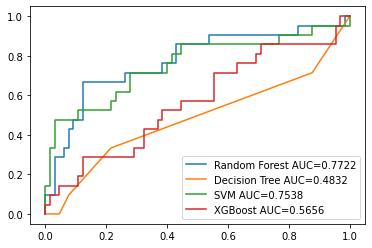

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred = rfc.predict_proba(test_features)[:, 1]
y_pred1 = dtc.predict_proba(test_features)[:, 1]
y_pred2 = SVM.predict_proba(test_features)[:, 1]
y_pred3 = xgc.predict_proba(test_features)[:, 1]

Yp=[y_pred,y_pred1,y_pred2,y_pred3]
titles=['Random Forest','Decision Tree','SVM','XGBoost']
def ROC(y_test,y_pred,title):
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
  auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
  plt.plot(fpr,tpr,label=title+" AUC="+str(auc))
  plt.legend()

n=4
j=0
for i in Yp:
  ROC(test_target,i,titles[j])
  j+=1


